#  Cardio Vascular Disease

The dataset consists of 70,000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.



The task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.



**Data description**

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.

Features:
Age | Objective Feature | age | int (days) <br>
Height | Objective Feature | height | int (cm) | <br>
Weight | Objective Feature | weight | float (kg) | <br>
Gender | Objective Feature | gender | categorical code | <br>
Systolic blood pressure | Examination Feature | ap_hi | int | <br>
Diastolic blood pressure | Examination Feature | ap_lo | int | <br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | <br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | <br>
Smoking | Subjective Feature | smoke | binary | <br>
Alcohol intake | Subjective Feature | alco | binary | <br>
Physical activity | Subjective Feature | active | binary | <br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [1]:
import pandas as pd
import numpy as np
##import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cardio_train.csv',sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Missing Values and Duplicate Rows**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# Delete Id column as there is no need of it
df.drop('id',axis=1,inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
features_with_null = [features for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('features with Null Values {}'.format(features_with_null))
else:
    print('No null values')

No null values


In [6]:
duplicate= df.duplicated().sum()
if duplicate:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 24


Deleting Duplicate rows

In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


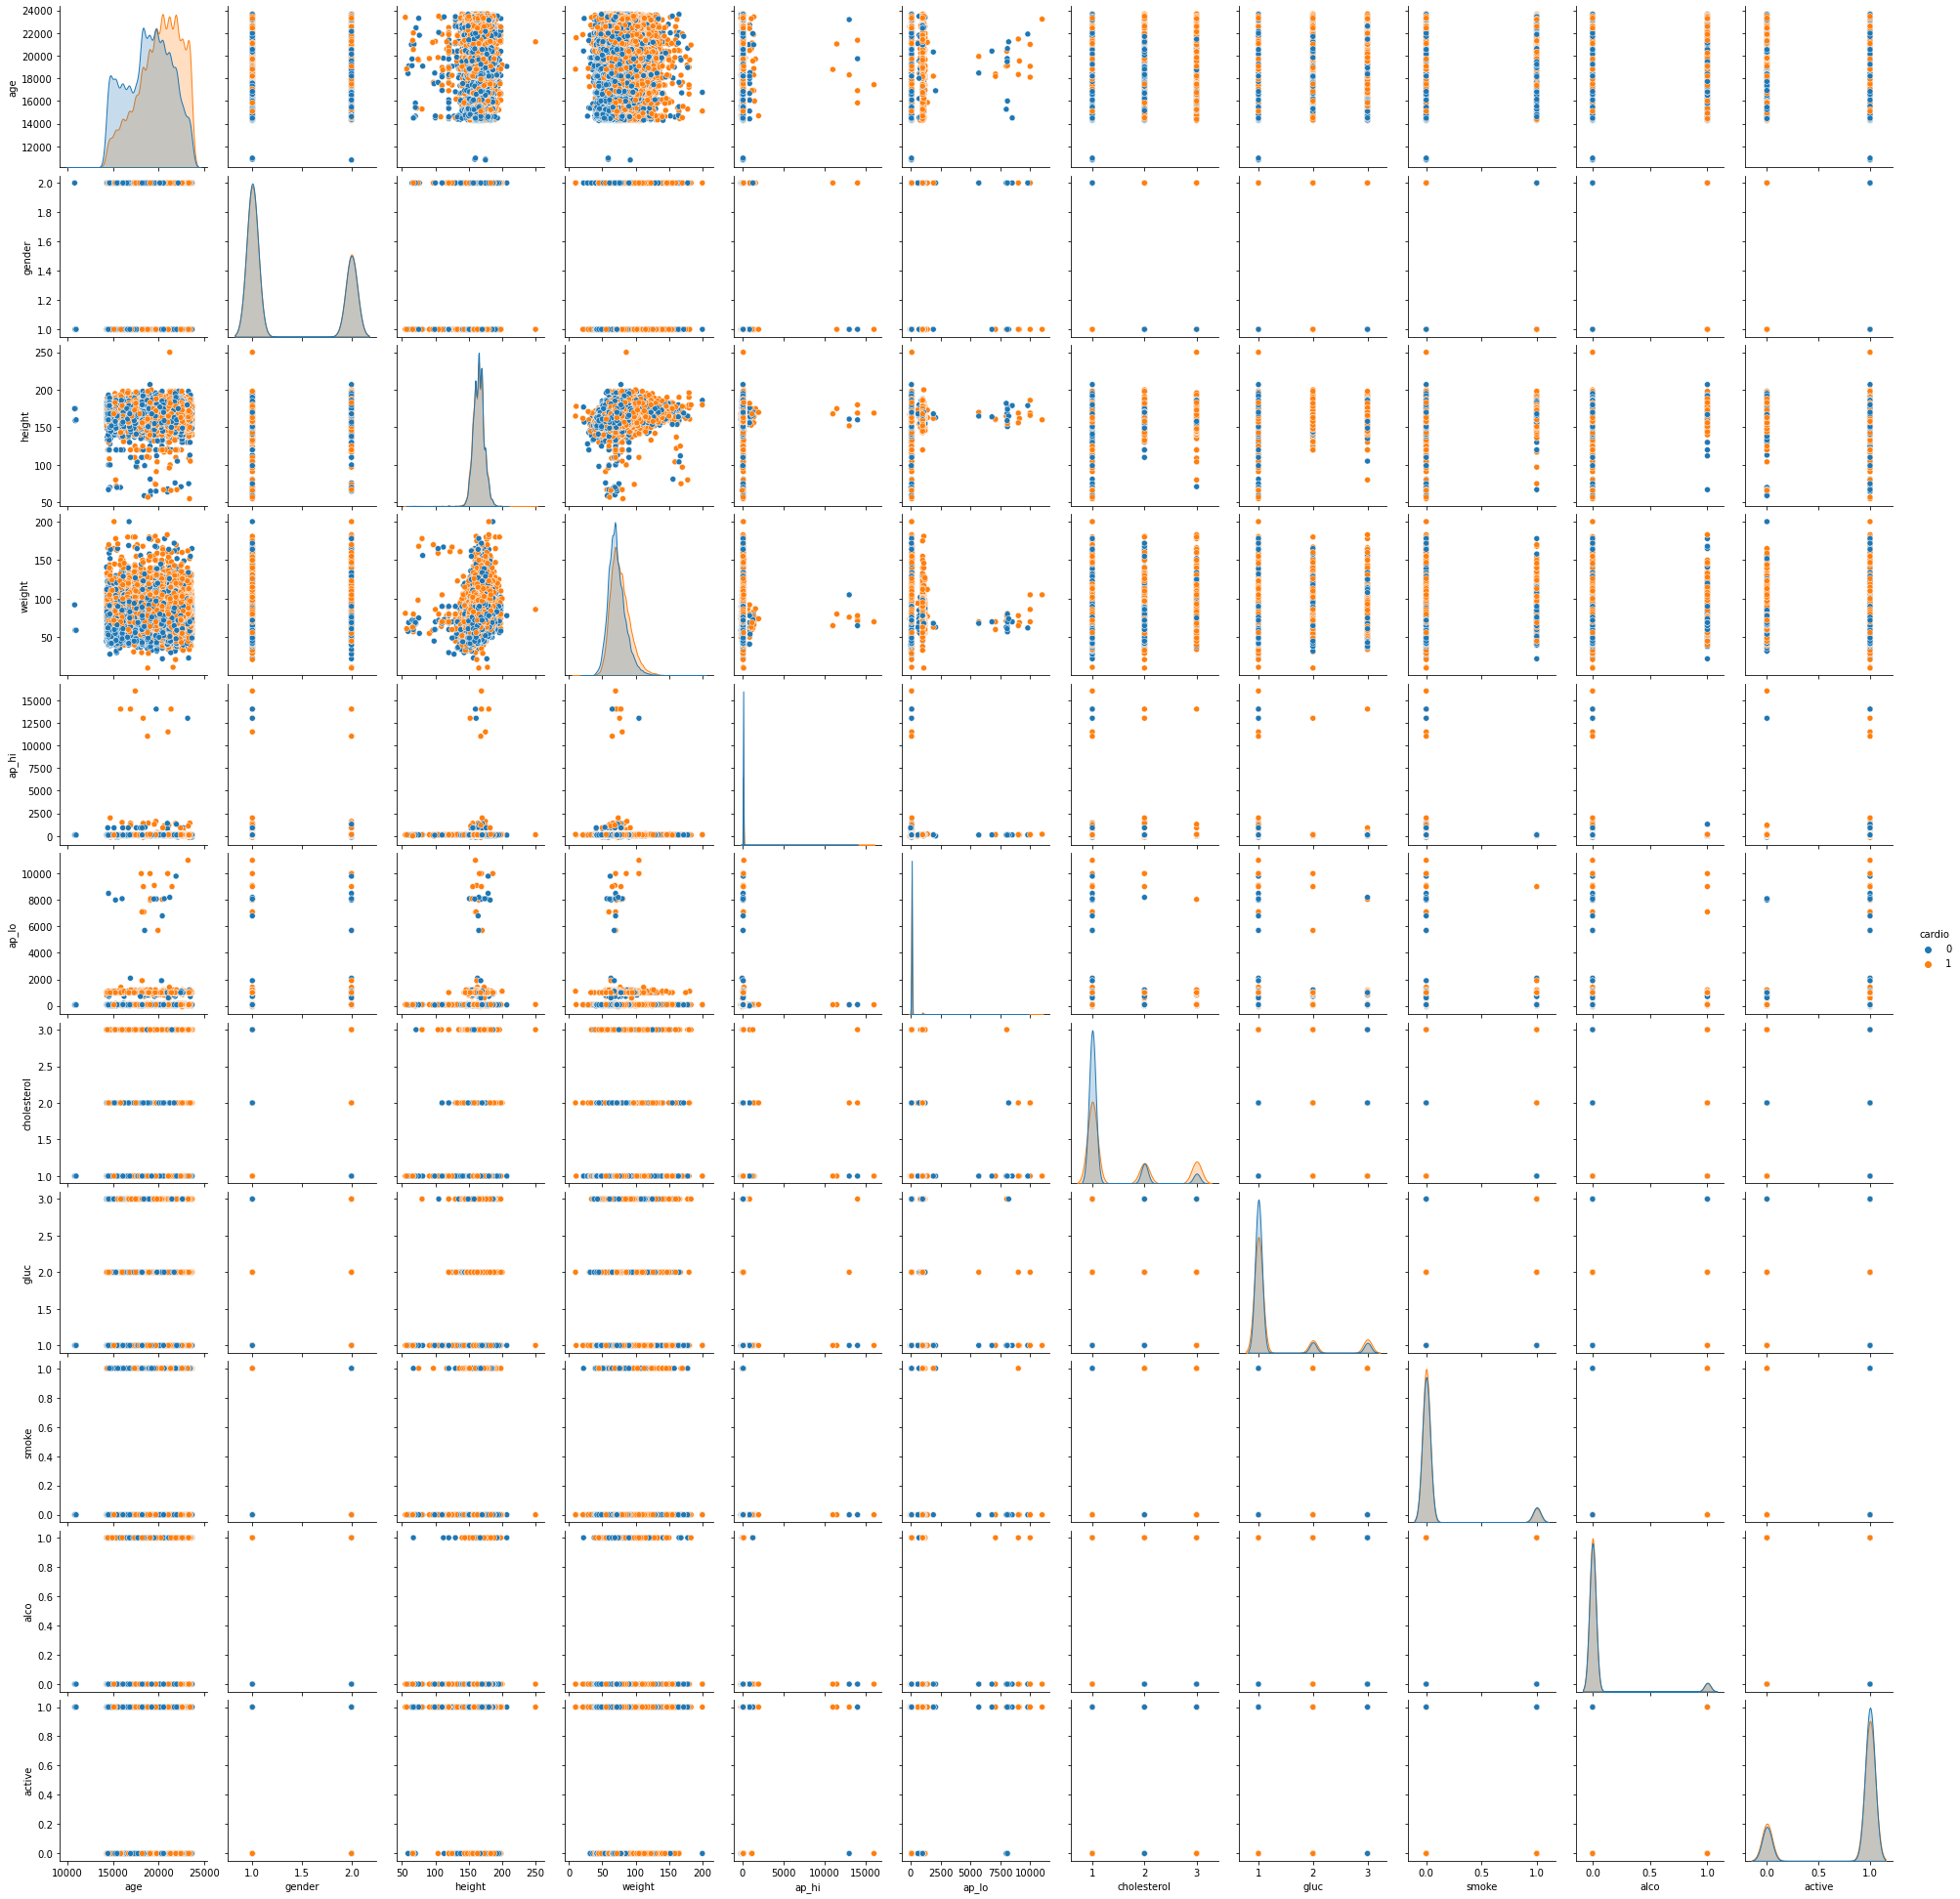

In [9]:
sns.pairplot(data=df,hue='cardio',diag_kind='kde')

Age is measured in days, height is in centimeters. Let's look at the numerical variables and how are they spread among cardio feature i.e. target variable. For example, at what age does the number of people with CVD exceed the number of people without CVD?


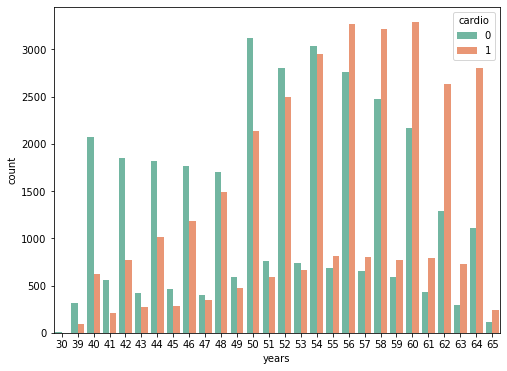

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

It can clearly be seen that people of age >55 has more chance of having cardio vascular disease.

Checking all the categorical variable

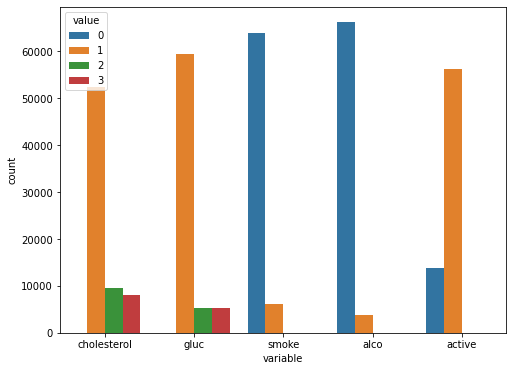

In [11]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));


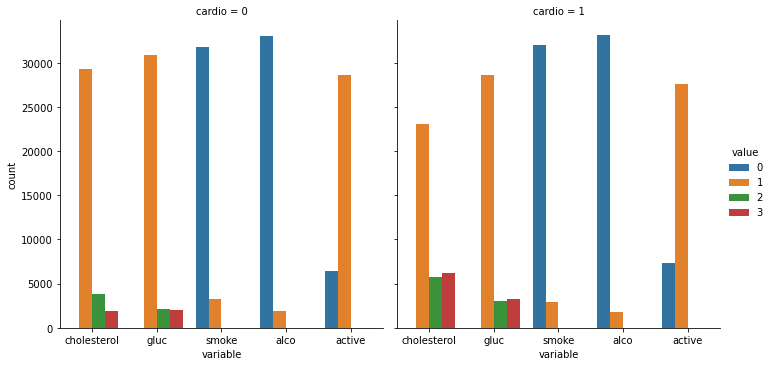

In [12]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

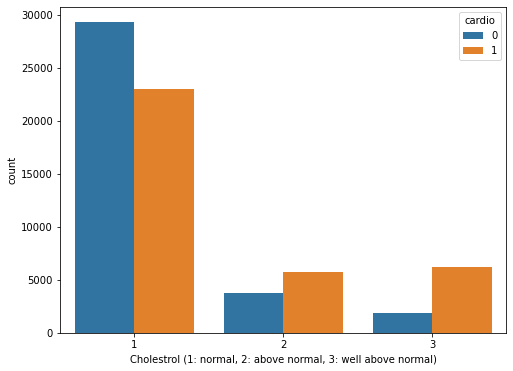

In [13]:
sns.countplot(x='cholesterol',data=df,hue='cardio');
rcParams['figure.figsize'] = 6,4
plt.xlabel('Cholestrol (1: normal, 2: above normal, 3: well above normal)');

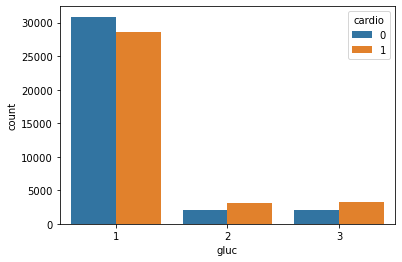

In [14]:
sns.countplot(x='gluc',data=df,hue='cardio');

As we can see person having high cholestrol and glucose, has high percentage of having CVD

checking the gender percentage

In [15]:
df.gender.value_counts()

1    45509
2    24467
Name: gender, dtype: int64

But as in data description it's not mentioned which number states to which gender, let's try to find the average height and weight of both

In [16]:
df.groupby('gender').height.mean()

gender
1    161.354347
2    169.948134
Name: height, dtype: float64

In [17]:
df.groupby('gender').weight.mean()

gender
1    72.568898
2    77.258238
Name: weight, dtype: float64

So from this we can say that categorical value 2 related to men and 1 relates to female, as generally men have higher height and weights.

Now let's check the percentage of people doing smoking and consuming alcohol of both genders

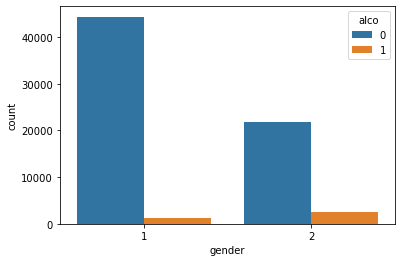

In [18]:
sns.countplot(x='gender',data=df,hue='alco');

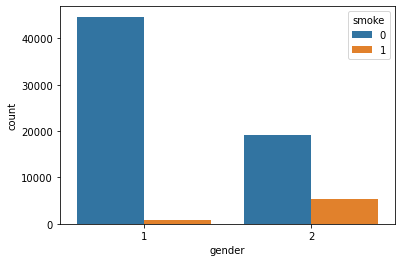

In [19]:
sns.countplot(x='gender',data=df,hue='smoke');

In [20]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [21]:
df.groupby('gender')['smoke'].sum()

gender
1     813
2    5356
Name: smoke, dtype: int64

So from this data we can clearly see that men smoke and consume alcohol more frequently on average.

It is nearly a balanced dataset 

In [22]:
df['cardio'].value_counts()

0    35004
1    34972
Name: cardio, dtype: int64

In [23]:
df.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50


<AxesSubplot:xlabel='years', ylabel='weight'>

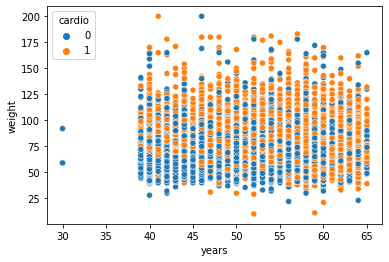

In [24]:
sns.scatterplot(x='years',y='weight',hue='cardio',data=df)

In [25]:
df.active.value_counts()

1    56241
0    13735
Name: active, dtype: int64

In [27]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    df_std = x.copy(deep=True)
    for column in s_list:
        df_std[column] = (df_std[column]-df_std[column].mean())/df_std[column].std()
    return df_std 
df_std=standartization(df)
df_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,-0.436071,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0,50
1,0.307635,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1,55
2,-0.248017,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1,52
3,-0.748143,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1,48
4,-0.808532,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0,48


In [28]:
from sklearn.model_selection import train_test_split

x=df_std.drop('cardio',axis=1)
y=df_std['cardio']

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [30]:
dt_model=dt.fit(x_train,y_train)
dt_score=dt_model.score(x_test,y_test)

rf_model=rf.fit(x_train,y_train)
rf_score=rf_model.score(x_test,y_test)

knn_model=knn.fit(x_train,y_train)
knn_score=knn_model.score(x_test,y_test)

svm_model=svm.fit(x_train,y_train)
svm_score=svm_model.score(x_test,y_test)

In [37]:
df_pred=dt_model.predict(x_test)
rf_pred=rf_model.predict(x_test)
knn_pred=knn_model.predict(x_test)
svm_pred=svm_model.predict(x_test)

In [39]:
scores={"Random Forest":rf_score,"Decision Tree":dt_score,"KNN":knn_score,"SVM":svm_score}
df_scores=pd.DataFrame(scores.items(),columns=['Models','Accuracy score'])
df_scores

,Models,Accuracy score
0,Random Forest,0.713204
1,Decision Tree,0.633181
2,KNN,0.638182
3,SVM,0.660546


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores={"Random Forest":precision_score(y_test,rf_pred),"Decision Tree":precision_score(y_test,df_pred),"KNN":precision_score(y_test,knn_pred),"SVM":precision_score(y_test,svm_pred)}
df_precision_scores=pd.DataFrame(precision_scores.items(),columns=['Models','Precision score'])
df_precision_scores

,Models,Precision score
0,Random Forest,0.724858
1,Decision Tree,0.641344
2,KNN,0.648922
3,SVM,0.693081


In [44]:
recall_scores={"Random Forest":recall_score(y_test,rf_pred),"Decision Tree":recall_score(y_test,df_pred),"KNN":recall_score(y_test,knn_pred),"SVM":recall_score(y_test,svm_pred)}
df_recall_scores=pd.DataFrame(recall_scores.items(),columns=['Models','Recall score'])
df_recall_scores

,Models,Recall score
0,Random Forest,0.699930
1,Decision Tree,0.627061
2,KNN,0.623679
3,SVM,0.592953


In [45]:
f1_scores={"Random Forest":f1_score(y_test,rf_pred),"Decision Tree":f1_score(y_test,df_pred),"KNN":f1_score(y_test,knn_pred),"SVM":f1_score(y_test,svm_pred)}
df_f1_scores=pd.DataFrame(f1_scores.items(),columns=['Models','Recall score'])
df_f1_scores

,Models,Recall score
0,Random Forest,0.712176
1,Decision Tree,0.634122
2,KNN,0.636050
3,SVM,0.639119


In [61]:
y_pred_proba = rf.predict_proba(x_test)[::,1]

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7735722953409638

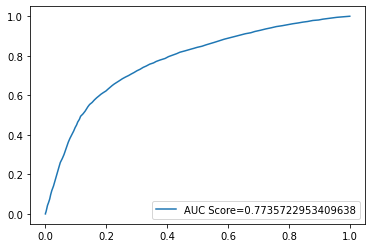

In [64]:
from sklearn import metrics


fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC Score="+str(auc))
plt.legend(loc=4)
plt.show()